In [1]:
import sys
sys.path.append("/home/zixuan11/qjx/FastEdit/")
from fastedit.utils.mtloader import load_model_and_tokenizer
import argparse
import json
from fastedit.utils.generate import generate_fast
from fastedit.rome import ROMEHyperParams,apply_rome_to_model
from fastedit.utils.template import Template
from transformers import PreTrainedModel, PreTrainedTokenizer, TextStreamer
import os
import torch
torch.cuda.set_device(7)
torch.cuda.current_device()
# os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from typing import List, Optional
import torch
import seaborn as sns

from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import copy
from experimental_data import *
from gradient import calculate_gradient
from plot import plot_gradients,draw_gradient_heatmap,compare_two_matrix_svd,inner_product_between_contexts,inner_product_heapmap
model,tokenizer,batch_first= load_model_and_tokenizer("/data/chihan3/cache/llama-2/llama-2-7b-hf",None,7)
with open(edited_data_path,"r") as json_file:
    edited_data = json.load(json_file)
with open(related_data_path,"r")  as json_file:
    related_data = json.load(json_file)
example = related_data[0]
hparams = ROMEHyperParams.from_name("llama-7b")
template = Template(name="default")
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)
import pickle


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
gradients_model_contexts = dict()
for i in range(len(contexts)):
    gradients,loss= calculate_gradient(model,tokenizer,contexts[i],targets[i],plot=False)
    gradients_model_contexts[contexts[i]] = copy.deepcopy(gradients)
torch.cuda.empty_cache()
# import pickle
# file_path = 'calculated_gradients.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump(gradients_model_contexts,file)

tensor(6.7008, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(3.4610, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(2.8292, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.0885, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.8893, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(4.3905, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.4746, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.1819, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(6.5110, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.0294, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.7662, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.5931, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.4413, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.4786, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.5481, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.4866, device='cuda:7', grad_fn=<NllLossBackward0>)


Reranked matrix after SVD


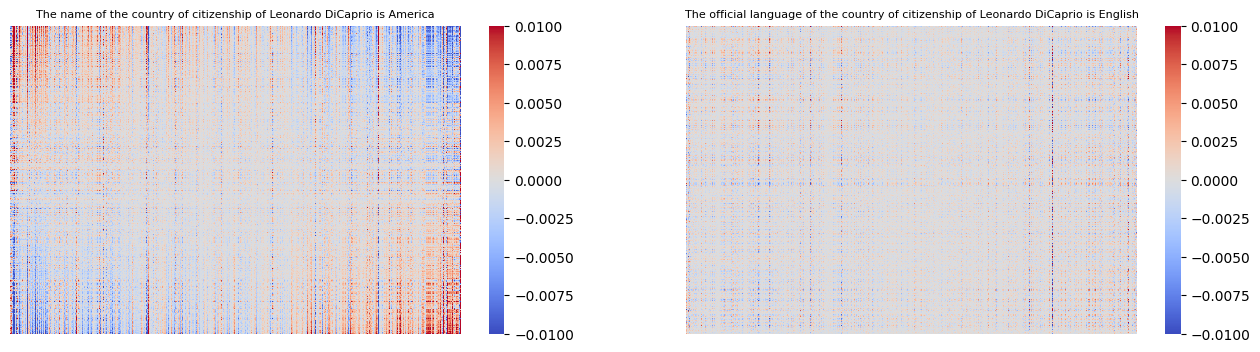

In [16]:
number0 = 2
number1 = 6
compare_two_matrix_svd(gradients_model_contexts[contexts[number0]],gradients_model_contexts[contexts[number1]],contexts[number0],contexts[number1],range_=0.01)

Reranked matrix after SVD


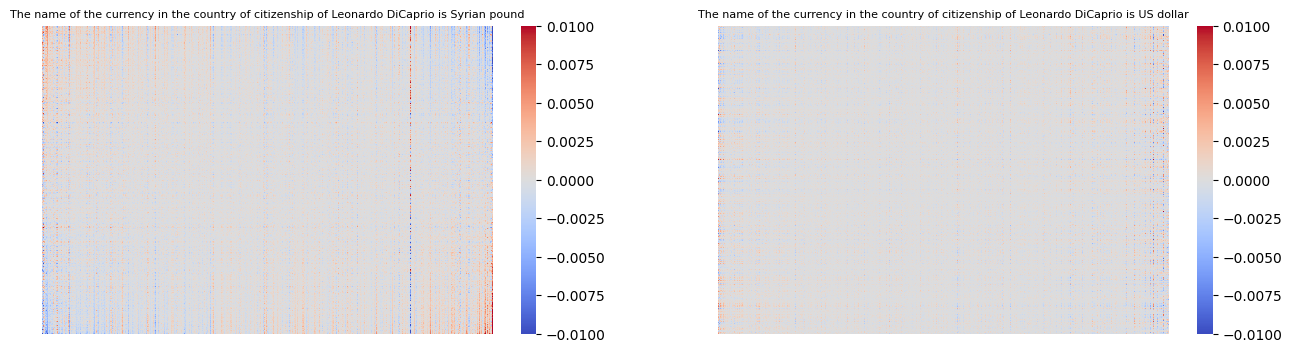

In [8]:
number0 = 1
number1 = 3
compare_two_matrix_svd(gradients_model_contexts[contexts[number0]],gradients_model_contexts[contexts[number1]],contexts[number0],contexts[number1],range_=0.01)

Reranked matrix after SVD


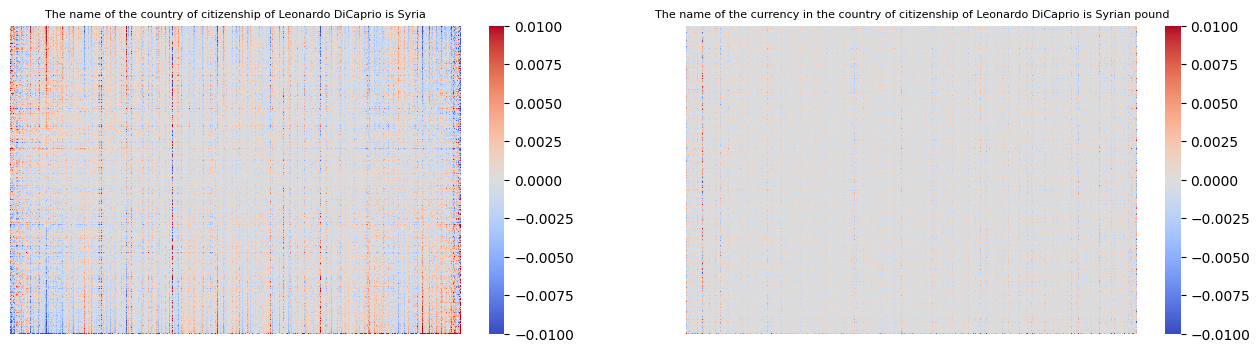

In [18]:
number0 = 0
number1 = 1
compare_two_matrix_svd(gradients_model_contexts[contexts[number0]],gradients_model_contexts[contexts[number1]],contexts[number0],contexts[number1],range_=0.01,name="model.layers.3.mlp.down_proj.weight")

In [53]:
a = torch.tensor([[1,2],[3,4]]).to(torch.float64).cuda()
b = torch.tensor([[2,1],[3,4]]).to(torch.float64).cuda()
inner_product = torch.matmul(a.view(1,-1),b.view(-1,1))/(torch.norm(a.view(1,-1),p=2)*torch.norm(b.view(-1,1),p=2))
inner_product

tensor([[0.9667]], device='cuda:7', dtype=torch.float64)

Reranked matrix after SVD


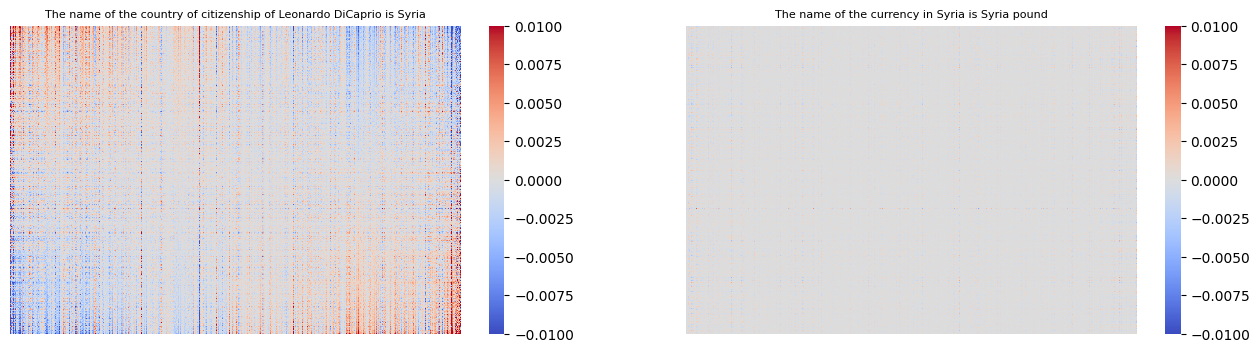

In [10]:
number0 = 0
number1 = 4
compare_two_matrix_svd(gradients_model_contexts[contexts[number0]],gradients_model_contexts[contexts[number1]],contexts[number0],contexts[number1],range_=0.01)

Reranked matrix after SVD


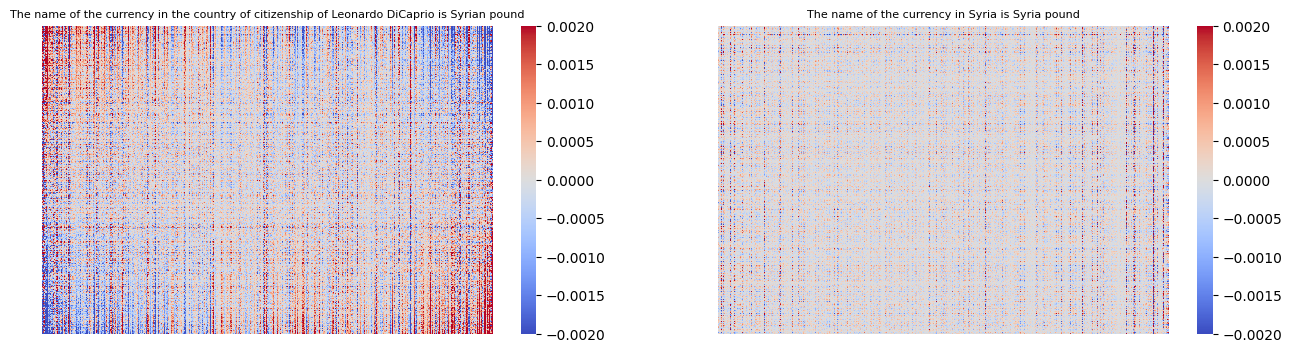

In [12]:
number0 = 1
number1 = 4
compare_two_matrix_svd(gradients_model_contexts[contexts[number0]],gradients_model_contexts[contexts[number1]],contexts[number0],contexts[number1],range_=0.002)

In [20]:
import torch.nn.functional as F


In [41]:
number0 = 11
number1 = 15
inner_dict = dict()
for i in gradients_model_contexts[contexts[number0]]:
    gradients_model_contexts[contexts[number0]][i] = gradients_model_contexts[contexts[number0]][i].cuda()
    gradients_model_contexts[contexts[number1]][i] = gradients_model_contexts[contexts[number1]][i].cuda()
    inner_product = torch.matmul(gradients_model_contexts[contexts[number0]][i].view(1,-1),gradients_model_contexts[contexts[number1]][i].view(-1,1))/(torch.norm(gradients_model_contexts[contexts[number0]][i].view(1,-1),p=2)*torch.norm(gradients_model_contexts[contexts[number1]][i].view(-1,1),p=2))
    gradients_model_contexts[contexts[number0]][i] = gradients_model_contexts[contexts[number0]][i].cpu()
    gradients_model_contexts[contexts[number1]][i] = gradients_model_contexts[contexts[number1]][i].cpu()
    inner_dict[i] = inner_product[0][0].item()

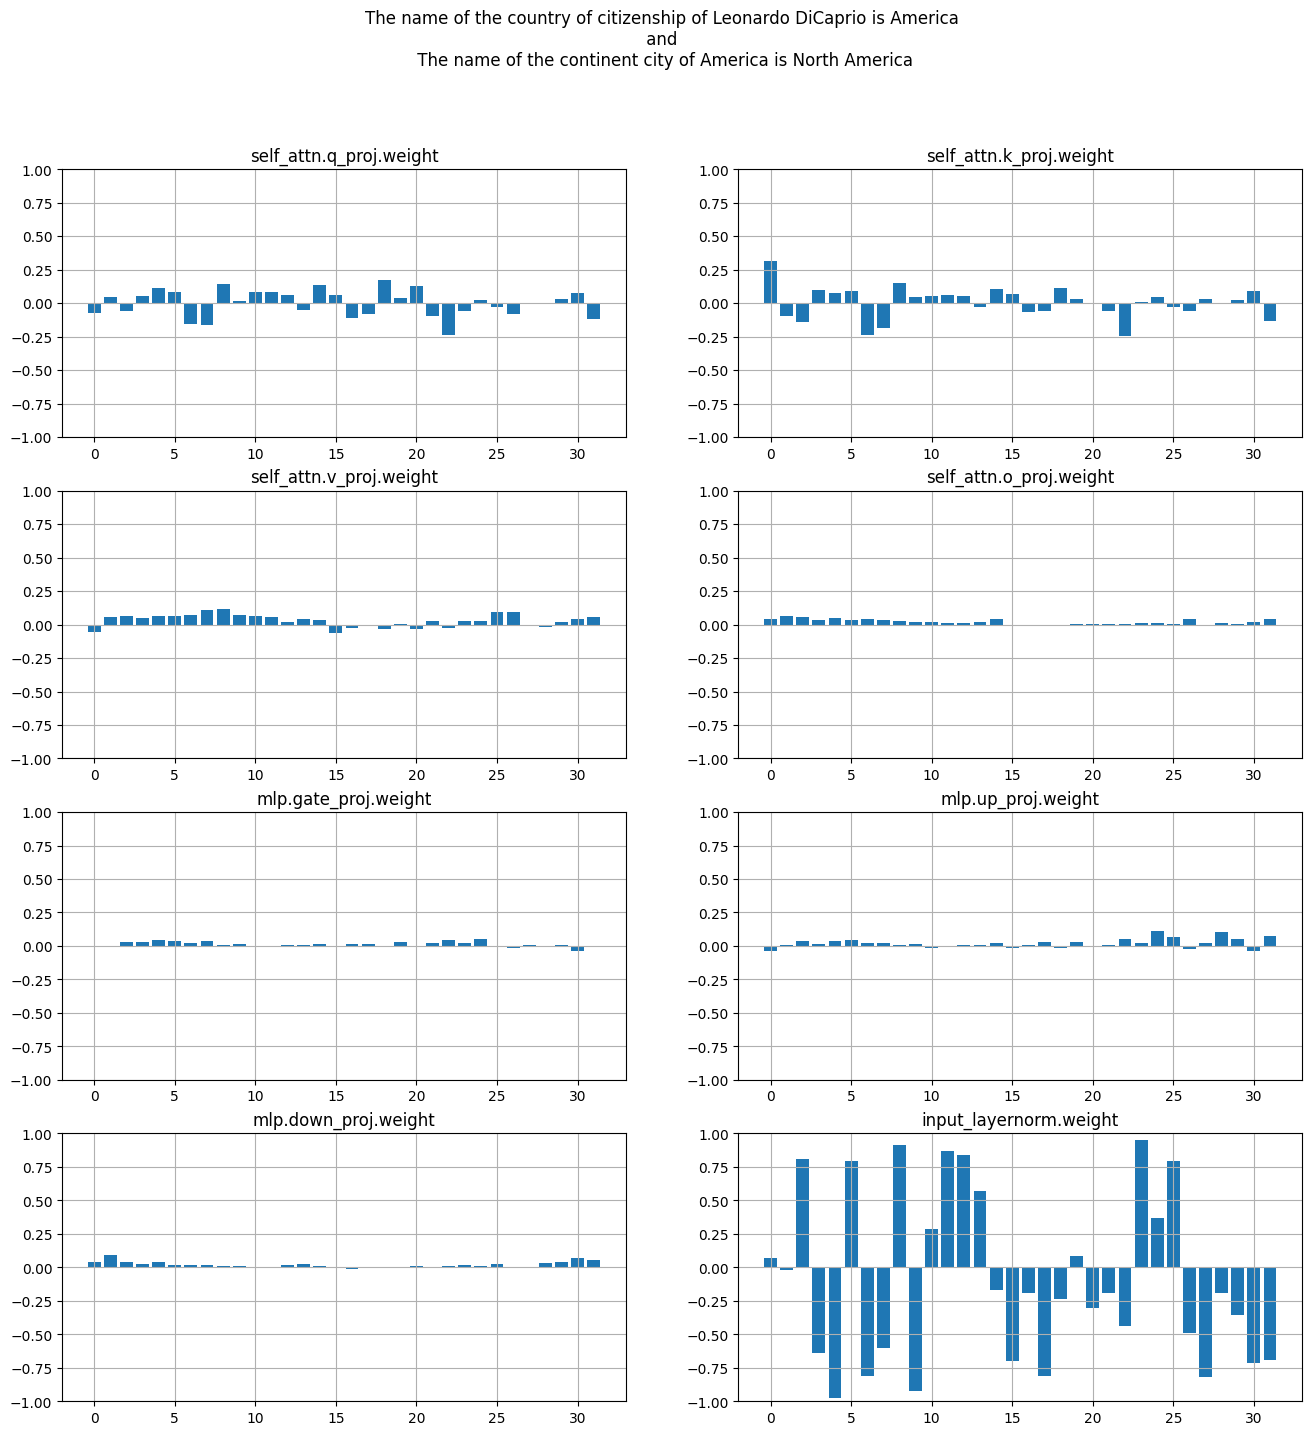

In [62]:
number0 = 2
number1 = 13
plt.figure(figsize=(16,16))
inner_dict = dict()
for i in gradients_model_contexts[contexts[number0]]:
    gradients_model_contexts[contexts[number0]][i] = gradients_model_contexts[contexts[number0]][i].cuda()
    gradients_model_contexts[contexts[number1]][i] = gradients_model_contexts[contexts[number1]][i].cuda()
    inner_product = torch.matmul(gradients_model_contexts[contexts[number0]][i].view(1,-1),gradients_model_contexts[contexts[number1]][i].view(-1,1))/(torch.norm(gradients_model_contexts[contexts[number0]][i].view(1,-1),p=2)*torch.norm(gradients_model_contexts[contexts[number1]][i].view(-1,1),p=2))
    gradients_model_contexts[contexts[number0]][i] = gradients_model_contexts[contexts[number0]][i].cpu()
    gradients_model_contexts[contexts[number1]][i] = gradients_model_contexts[contexts[number1]][i].cpu()
    inner_dict[i] = inner_product[0][0].item()
ys = {}
for name in names:
    ys[name] = []
    for i in inner_dict:
        if name in i:
            ys[name].append(inner_dict[i])

x = np.arange(32)
a = 0
for i in ys:
    plt.subplot(4,2,a+1)
    plt.bar(x,ys[i])
    plt.ylim(-1, 1)
    plt.title(i)
    plt.grid(True)
    a+=1
plt.suptitle(f"{contexts[number0]}\n and \n {contexts[number1]}")
# plt.legend()
plt.grid(True)